# Python Basics

These assignments aim to get you acquainted with Python, which is an important requirement for all the research done at Solarillion Foundation. Apart from teaching you Python, these assignments also aim to make you a better programmer and cultivate better coding practices. 

Visit these links for more details: <br>
PEP8 Practices: https://www.python.org/dev/peps/pep-0008/ <br>
Check PEP8: http://pep8online.com <br>
Python Reference: https://www.py4e.com/lessons <br>

Do use Google efficiently, and refer to StackOverflow for clarifying any programming doubts. If you're still stuck, feel free to ask a TA to help you.

Each task in the assignment comprises of at least two cells. There are function definitions wherein you will name the function(s), and write code to solve the problem at hand. You will call the function(s) in the last cell of each task, and check your output.

We encourage you to play around and learn as much as possible, and be as creative as you can get. More than anything, have fun doing these assignments. Enjoy!

# Important
* **Only the imports and functions must be present when you upload this notebook to GitHub for verification.** 
* **Do not upload it until you want to get it verified. Do not change function names or add extra cells or code, or remove anything.**
* **For your rough work and four showing your code to TAs, use a different notebook with the name Module2Playground.ipynb and copy only the final functions to this notebook for verification.**

# Module 2
Scope: NumPy, pandas, pickle, matplotlib, File operations

## Imports - Always Execute First!
Import any modules and turn on any magic here:

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle as pk
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic("matplotlib", "inline")

## Task 1

Basics of NumPy, pandas, pickle and matplotlib.

**Question 1**

"""
    Read the pickle file 'Data/Stress.pkl' and transform the contents into a
    a pandas DataFrame of the following form:
    
            +------+------+------+-----+------+-------+
            | ACCx | ACCy | ACCz | ECG | RESP | LABEL |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+
            |      |      |      |     |      |       |
            +------+------+------+-----+------+-------+

            Shape: (700, 6)

    Save this DataFrame as a CSV file.

    Modules
    -------
    pickle, pandas
    
    Lookups
    -------
    NumPy and pandas basics (Check the Lookups folder)
    Try to complete the tasks in the Lookups, and play around with the notebooks.
"""        

In [28]:
def pickle_to_csv(filename):
    """
        Function: pickle_to_csv(filename)
        Parameters: filename (String)
        Save: DataFrame as `Stress.csv` in folder `Data`
        Return: DataFrame
    """
    file_in = 'Data/' + filename + '.pkl'
    pk_in = open(file_in,"rb")
    data = pk.load(pk_in)
    df = pd.DataFrame() 
    
    acc = data['signal']['ACC']
    ecg = data['signal']['ECG']
    resp = data['signal']['RESP']
    label = data['signal']['LABEL']
    #print(label)

    #ACCs
    accX = [item[0] for item in acc]
    accY = [item[1] for item in acc]
    accZ = [item[2] for item in acc]
    df['ACCx'] = accX
    df['ACCy'] = accY
    df['ACCz'] = accZ

    #ECG
    ecg = [item[0] for item in ecg]
    df['ECG'] = ecg

    #RESP
    flattened_resp = [item[0] for item in resp]
    df['RESP'] = flattened_resp

    #LABEL
    label = [i[0] for i in label]
    df['LABEL'] = label
    df.to_csv('Data/Stress.csv')
    
    return df
    

In [29]:
# Call your function here 
df = pickle_to_csv('Stress')
df

,ACCx,ACCy,ACCz,ECG,RESP,LABEL
0,0.9554,-0.2220,-0.5580,0.021423,-1.148987,0.0
1,0.9258,-0.2216,-0.5538,0.020325,-1.124573,0.0
2,0.9082,-0.2196,-0.5392,0.016525,-1.152039,0.0
3,0.8974,-0.2102,-0.5122,0.016708,-1.158142,0.0
4,0.8882,-0.2036,-0.4824,0.011673,-1.161194,0.0
...,...,...,...,...,...,...
695,0.9134,-0.1400,0.1074,0.003479,2.299500,7.0
696,0.9092,-0.1394,0.0994,0.000778,2.305603,7.0
697,0.9084,-0.1414,0.0934,-0.001694,2.297974,7.0
698,0.9116,-0.1416,0.0958,-0.003799,2.354431,7.0


**Question 2**

In [30]:
"""
    Find the number of occurrences of each unique value in `LABEL` (count of values).
    
    Add a column `BINARY` to the DataFrame which contains 1 if `LABEL` is 2,
    else 0.
    
    Find the mean, minimum, maximum and standard deviation of `RESP` for each value in `LABEL`.
"""

'\n    Find the number of occurrences of each unique value in `LABEL` (count of values).\n    \n    Add a column `BINARY` to the DataFrame which contains 1 if `LABEL` is 2,\n    else 0.\n    \n    Find the mean, minimum, maximum and standard deviation of `RESP` for each value in `LABEL`.\n'

In [31]:
def count_unique(dataframe):
    """
        Function 1: count_unique(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing count of values in `LABEL`
    """
    return dict(dataframe['LABEL'].value_counts())

In [32]:
# Call your function here
count_unique(df)

{0.0: 100, 1.0: 100, 2.0: 100, 6.0: 100, 4.0: 100, 3.0: 100, 7.0: 100}

In [33]:
def add_binary(dataframe):
    """
        Function 2: add_binary(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: DataFrame (updated, containing `BINARY`)
    """
    dataframe['BINARY'] = dataframe['LABEL'].apply(lambda x: 1 if x == 2 else 0)
    return dataframe

In [34]:
# Call your function here
add_binary(df)

,ACCx,ACCy,ACCz,ECG,RESP,LABEL,BINARY
0,0.9554,-0.2220,-0.5580,0.021423,-1.148987,0.0,0
1,0.9258,-0.2216,-0.5538,0.020325,-1.124573,0.0,0
2,0.9082,-0.2196,-0.5392,0.016525,-1.152039,0.0,0
3,0.8974,-0.2102,-0.5122,0.016708,-1.158142,0.0,0
4,0.8882,-0.2036,-0.4824,0.011673,-1.161194,0.0,0
...,...,...,...,...,...,...,...
695,0.9134,-0.1400,0.1074,0.003479,2.299500,7.0,0
696,0.9092,-0.1394,0.0994,0.000778,2.305603,7.0,0
697,0.9084,-0.1414,0.0934,-0.001694,2.297974,7.0,0
698,0.9116,-0.1416,0.0958,-0.003799,2.354431,7.0,0


In [35]:
def compute_resp(dataframe):
    """
        Function 3: compute_resp(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Return: dict containing mean, min, max and standard deviation of `RESP`
                for each value in `LABEL`
        Dictionary Format: {label_value: [mean, min, max, std_dev]}
        Example: {1: [1, 0, 2, 1], 2: [0, -1, 1, 1], ... }
    """
    res_dict = {}
    labels = dataframe['LABEL'].unique()
    
    for label in labels:
        resp = dataframe[dataframe['LABEL'] == label]['RESP']

        mean = np.mean(resp)
        min_val = np.min(resp)
        max_val = np.max(resp)
        std_dev = np.std(resp)
        
        res_dict[label] = [mean, min_val, max_val, std_dev]
        
    return res_dict

In [36]:
# Call your function here
compute_resp(df)

{0.0: [-1.19342041015625,
  -1.39617919921875,
  -1.12457275390625,
  0.04203528033932046],
 1.0: [0.7134246826171875,
  -0.23345947265625,
  1.19171142578125,
  0.2940525333840547],
 2.0: [-1.0665130615234375,
  -1.63116455078125,
  -0.86517333984375,
  0.12759037281837993],
 6.0: [0.084747314453125,
  -0.4180908203125,
  0.16632080078125,
  0.0851857127833388],
 4.0: [-2.1305999755859375,
  -2.54364013671875,
  -2.00042724609375,
  0.08763559613827641],
 3.0: [-0.5306396484375,
  -1.27105712890625,
  -0.09918212890625,
  0.24275176012111174],
 7.0: [1.1905059814453125,
  -0.00457763671875,
  2.35595703125,
  0.6897215474335764]}

**Question 3**

In [37]:
"""
    Plot `RESP` using matplotlib (pyplot):
    - First, just plot the raw values.
    - Next, try using different colours for data points based on `BINARY`.
    - Experiment and come up with a useful plot.
"""

'\n    Plot `RESP` using matplotlib (pyplot):\n    - First, just plot the raw values.\n    - Next, try using different colours for data points based on `BINARY`.\n    - Experiment and come up with a useful plot.\n'

In [38]:
def plot_raw(dataframe):
    """
        Function 1: plot_raw(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharey=True)
    ax[0].plot(dataframe['RESP'], color = 'green')
    ax[1].scatter(dataframe.index, dataframe['RESP'])
    
    fig.suptitle("RESP Values")

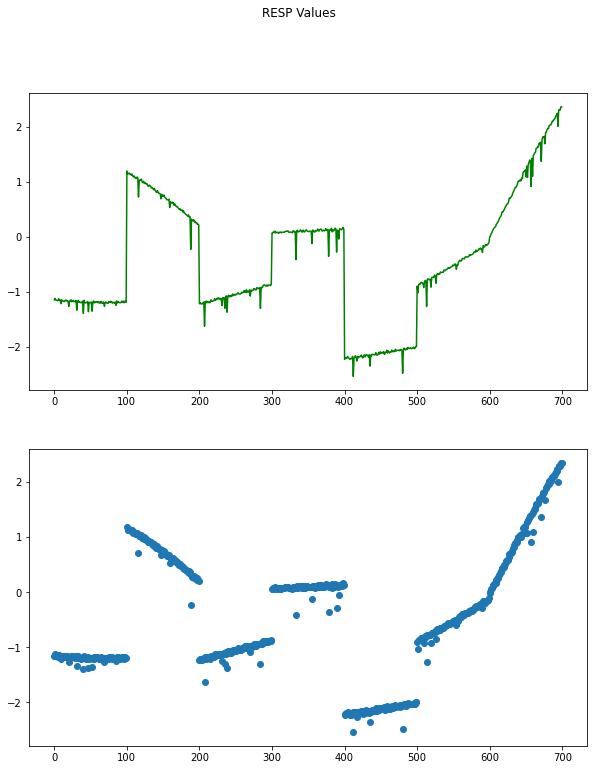

In [39]:
# Call your function here
plot_raw(df)

In [40]:
def plot_coloured(dataframe):
    """
        Function 2: plot_coloured(dataframe)
        Parameters: dataframe: Stress data DataFrame
        Output: Plot
    """
    plt.figure(figsize = (10, 6))
    plt.scatter(dataframe.index, dataframe['RESP'], c = dataframe['BINARY'])
    plt.colorbar(label = 'BINARY')
    plt.ylabel('RESP Values')


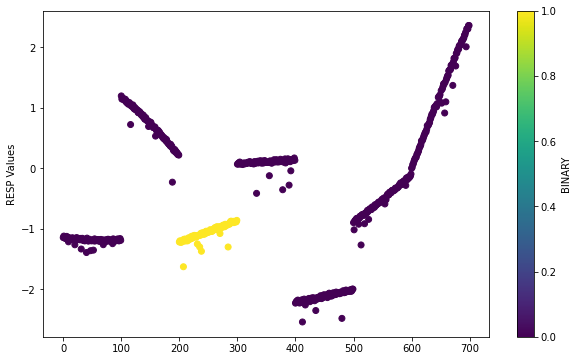

In [41]:
# Call your function here
plot_coloured(df)

## Task 2

Some simple file operations.

In [42]:
"""
    Generate a text file containing 50 integer elements between 1 and 20 (use `random`). 
    Identify the unique numbers and the number of their occurrences, and write this into 
    a new text file.
    
    Example
    -------
    
    Generated File
    --------------
    1 2 3 4 3 2 1 ...
    
    Count File
    ----------
    1 - 2
    2 - 2
    3 - 2
    4 - 1
    ...
"""

'\n    Generate a text file containing 50 integer elements between 1 and 20 (use `random`). \n    Identify the unique numbers and the number of their occurrences, and write this into \n    a new text file.\n    \n    Example\n    -------\n    \n    Generated File\n    --------------\n    1 2 3 4 3 2 1 ...\n    \n    Count File\n    ----------\n    1 - 2\n    2 - 2\n    3 - 2\n    4 - 1\n    ...\n'

In [43]:
import random 
def random_numbers():
    """
        Function: random_numbers()
        Save: `Numbers.txt` containing the 50 integers,
              `Count.txt` containing the count of unique integers
    """
    random_nums = []
    for i in range(50):
        random_nums.append(random.randint(1, 20))
    with open('Numbers.txt', 'w') as new:
        new.write(' '.join(map(str, random_nums)))

    
    count_freq = {}
    for num in sorted(random_nums):
        if num in count_freq:
            count_freq[num] += 1
        else:
            count_freq[num] = 1
    
    with open('Count.txt', 'w') as new:
        for num, count in count_freq.items():
            new.write(f"{num} - {count}\n")

In [44]:
# Call your function here
random_numbers()

Once you're done, move on to Module 3. Great job!